In [1]:
import numpy as np

std::vector<cwoVect> Sphere::sample_pls(int samples) {
	std::vector<cwoVect> ps;

	std::default_random_engine generator;
	std::uniform_real_distribution<float> dist(0, 1);

	for (int k = 0; k < samples; k++) {
		float i = dist(generator);
		float j = dist(generator);

		float theta = 2 * CWO_PI * i;
		float phi = acos(2 * j - 1);

		float x = cos(theta) * sin(phi);
		float y = sin(theta) * sin(phi);
		float z = cos(phi);

		ps.push_back(cwoVect(x, y, z));
	}

	return ps;
}

In [69]:
def generate_sphere(samples, z):
    
    for i in range(samples):
        theta = 2 * np.pi * np.random.rand()
        phi = np.arccos(2 * np.random.rand() - 1)
        
        yield np.array([np.cos(theta) * 
                        np.sin(phi), np.sin(theta) *
                        np.sin(phi), np.cos(phi)]) + [0, 0, z]

In [72]:
list(generate_sphere(20 ,1))

[array([-0.44717596,  0.62068077,  1.64404119]),
 array([ 0.53853892, -0.4156527 ,  1.7329452 ]),
 array([ 0.94753036, -0.13470722,  1.28989685]),
 array([0.28248105, 0.9340934 , 0.78165627]),
 array([0.29578889, 0.2728501 , 0.08454287]),
 array([-0.57727034, -0.81582698,  0.96557203]),
 array([ 0.73995314, -0.67144936,  0.95968745]),
 array([ 0.47956674, -0.10790231,  0.12915396]),
 array([ 0.11424597, -0.46772795,  0.12354212]),
 array([ 0.721835  , -0.29874234,  0.37573464]),
 array([ 0.39712279, -0.11721775,  1.91024913]),
 array([-0.123873  , -0.8073556 ,  0.42308371]),
 array([-0.97904893,  0.18439654,  0.91362225]),
 array([-0.80005156,  0.33722829,  1.49617998]),
 array([-0.85444333, -0.0458974 ,  0.48248669]),
 array([-0.52239371,  0.76231063,  0.61791713]),
 array([ 0.31542615, -0.89893448,  0.69598824]),
 array([0.43002716, 0.84446787, 1.31929712]),
 array([-0.94127419, -0.29408515,  0.83411801]),
 array([ 0.10656437, -0.16328043,  0.01919241])]

In [110]:
l = 635
k = 2 * np.pi * l
ref = 1e-4 * np.array([0.3, 0.0, 0.3])

def r(px, point):
    return k * np.sqrt((px[0] - point[0])**2 + (px[1] - point[1])**2 + point[2]**2)

def shade(p, pix):
    n = p - np.array([0, 0, z])
    pix = np.append(pix, 0)
    d = np.dot(n, p - pix)
    
    if d > 0:
        return d
    else:
        return 0.0

def pls(pix, point):
    a = shade(point, pix)
    
    r_p = r(pix, point)
    
    return (a / r_p) * np.cos(k * r_p + np.random.rand() * 2 * np.pi) # * np.cos(r(pix, point) - r(pix, ref))

In [145]:
nx = 100
ny = 100

dx = 5e-6
dy = 5e-6

z = .5

top_left = np.array([0.0 - dx * nx / 2, 0.0 + dy * ny / 2])

img = np.zeros((nx, ny))

sphere_samples = list(generate_sphere(50, z))

for i in range(nx):
    for j in range(ny):
        ps = top_left + np.array([i * dx, -j * dy])
        
        img[i, j] += np.sum([ pls(ps, p * np.array([1e-5, 1e-5, 1e-5])) for p in sphere_samples ])
        

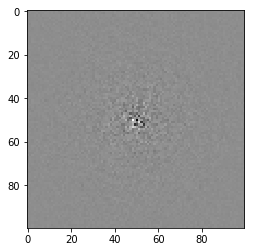

In [146]:
import matplotlib.pyplot as plt

img = np.interp(img, (img.min(), img.max()), (0, 255))

plt.imshow(img, cmap='gray')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


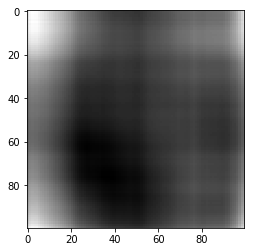

In [134]:
fft =  np.real(np.fft.ifft2(img))
fft = np.interp(fft, (fft.min(), fft.max()), (0, 255))

kino = np.arctan(np.real(img) / (np.imag(img) + np.finfo(float).eps))
#kino = np.interp(kino, (kino.min(), kino.max()), (0, 255))



def impulse(p, z):
    return np.exp(1.0j * (np.pi / (l * z)) * (p[0] ** 2 + p[1] ** 2))

def recon(holo, z):
    
    imp = np.zeros((nx, ny))
    #holo = np.pad(holo, ((nx // 4, nx // 4), (ny // 4, ny // 4)), 'constant')
    holo = np.fft.fftshift(holo)
    
    for i in range(nx):
        for j in range(ny):
            ps = top_left + np.array([i * dx, -j * dy])
            
            imp[i, j] = impulse(ps, z)
            
    imp = np.fft.fftshift(imp)
    holo = np.fft.ifft2(np.fft.fft2(holo) * np.fft.fft2(imp))
    holo = np.fft.fftshift(holo)
    
    return holo * np.exp(1.0j * k * z) / (1.0j * l * z)

re = recon(img, z * 1e-5)
re = np.real(re)
re = np.interp(re, (re.min(), re.max()), (0, 255))
plt.imshow(re, cmap='gray')

AttributeError: module 'numpy' has no attribute 'i'

In [131]:
top_left

array([-6.25e-05,  6.25e-05])

In [185]:
sphere_samples

[array([-0.85103608, -0.18093279,  0.50704877]),
 array([ 0.32790518, -0.08891867,  0.0594833 ]),
 array([0.49987704, 0.81766584, 0.71443825]),
 array([ 0.1848264 , -0.08594826,  1.97900567]),
 array([-0.18079317,  0.83494184,  0.48020585]),
 array([ 0.42152378, -0.87861807,  1.22438358]),
 array([-0.69994172,  0.685085  ,  0.79815815]),
 array([0.20658791, 0.78438754, 1.58485693]),
 array([0.13963607, 0.66458537, 1.73404909]),
 array([-0.49291858,  0.30140664,  0.18379824]),
 array([0.19823344, 0.96915882, 0.85359411]),
 array([-0.73572261,  0.19105236,  1.64977784]),
 array([0.77146997, 0.40278435, 1.49254326]),
 array([0.7225215 , 0.53239274, 0.55895505]),
 array([0.66716288, 0.7443497 , 0.97106537]),
 array([-0.81158544,  0.16962472,  0.44093244]),
 array([-0.91197104, -0.32819334,  0.75383347]),
 array([0.46591831, 0.7199171 , 0.48556877]),
 array([-0.39048878,  0.87535869,  0.71492863]),
 array([ 0.89371673, -0.10323945,  1.43659137]),
 array([-0.03391414, -0.79079173,  1.6111450